# Image Preprocessing with scikit-image

In [2]:
# !poetry add scikit-image

## Dataset

Source: http://www.robots.ox.ac.uk/~vgg/data/pets/

## Inspect the dataset

In [3]:
import glob
import os
import random
import warnings

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float, io
from skimage.color import rgb2gray
from skimage.transform import resize, rotate

%matplotlib inline
warnings.simplefilter("ignore")

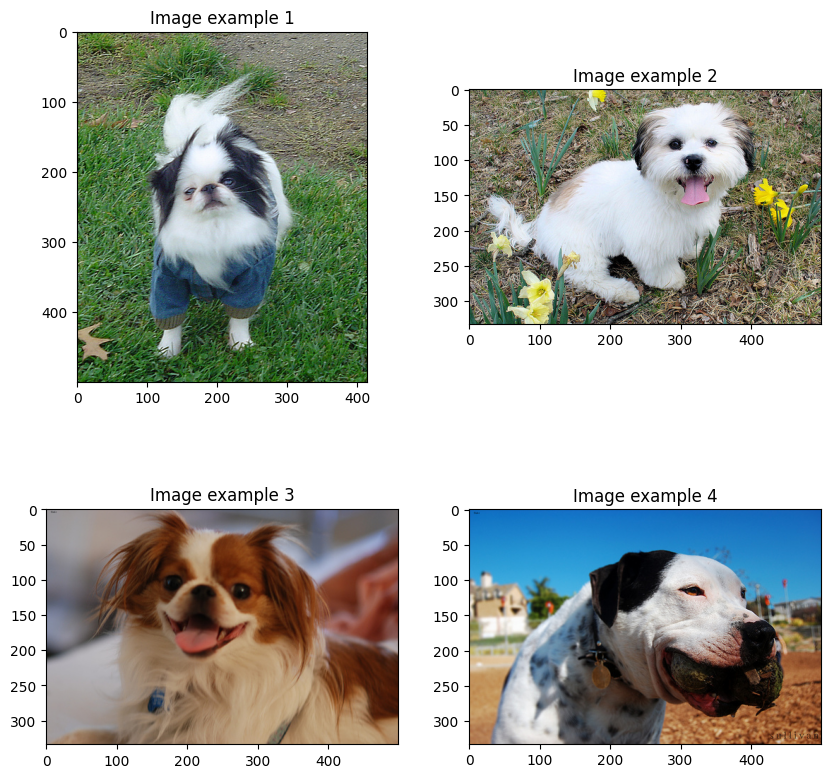

In [5]:
# Create a list of all images
root_path = os.path.expanduser("../../data/image_preprocessing_dataset")
all_images = glob.glob(root_path + "/*.jpg")

# To avoid memory errors we will only use a subset of the images
all_images = random.sample(all_images, 500)

# Plot a few images
i = 0
fig = plt.figure(figsize=(10, 10))
for img_path in all_images[:4]:
    img_arr = io.imread(img_path)
    i += 1
    ax = fig.add_subplot(2, 2, i)
    ax.imshow(img_arr)
    ax.set_title(f"Image example {i}")

## Rescale the images

In [6]:
all_sizes = [io.imread(img).shape for img in all_images]

heights = [img_shape[0] for img_shape in all_sizes]
widths = [img_shape[1] for img_shape in all_sizes]

print(f"Minimum image height: {min(heights)}")
print(f"Maximum image height: {max(heights)}")
print()
print(f"Minimum image width: {min(widths)}")
print(f"Maximum image width: {max(widths)}")

Minimum image height: 173
Maximum image height: 740

Minimum image width: 163
Maximum image width: 800


In [12]:
resized_path = os.path.join(root_path, "resized_images/")

for img_path in all_images:
    # Create a new image name to save the resized image
    img_name = img_path.split("/")[-1]
    img_name = os.path.splitext(img_name)
    resized_name = img_name[0] + "_resized" + img_name[1]
    save_path = os.path.join(resized_path, resized_name)

    img = io.imread(img_path)

    if img.ndim != 3 or img.shape[2] != 3:
        continue

    resized_img = resize(img, output_shape=(256, 256))
    io.imsave(save_path, resized_img)

TypeError: Cannot handle this data type: (1, 1, 3), <f8